In [ ]:
  from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [ ]:
# change the path if necessary
df = pd.read_csv("/content/online_shoppers_intention.csv")

In [ ]:
# informasi general tentang dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Pengamatan:

* Data terdiri dari 12330 baris dan 18 kolom
* Semua kolom tidak memiliki null/missing values
* tipe data untuk setiap kolom sudah sesuai
* Also Dataset have bool(2), float64(7), int64(7), object(2)
* Target Variable have bool values, so it is a binary classification problem

# Cuplikan Data

In [ ]:
# run code ini beberapa kali
df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
6930,4,62.000000,1,87.6,88,3634.585714,0.005564,0.035702,1.435224,0.0,Oct,2,2,1,3,Returning_Visitor,False,False
12066,0,0.000000,0,0.0,44,2588.154762,0.009091,0.027273,0.000000,0.0,Dec,2,2,1,1,Returning_Visitor,False,False
8374,0,0.000000,4,102.0,93,2835.417641,0.007544,0.037316,0.000000,0.0,Dec,2,2,4,1,Returning_Visitor,False,False
3764,4,318.666667,0,0.0,32,1205.583333,0.006452,0.010753,37.609355,0.0,May,2,2,1,2,Returning_Visitor,True,False
11101,0,0.000000,0,0.0,10,174.083333,0.060000,0.070000,0.000000,0.0,Nov,2,2,9,1,Returning_Visitor,True,False


Pengamatan

* Tidak ada anomali pada setiap entri (kolom sudah sesuai)

# Statistical Summary

In [ ]:
# pengelompokan kolom berdasarkan jenisnya
nums = ['Administrative',	'Administrative_Duration', 'Informational',	'Informational_Duration',	'ProductRelated',	'ProductRelated_Duration',	'BounceRates',	'ExitRates',	'PageValues',	'SpecialDay', 'OperatingSystems',	'Browser',	'Region',	'TrafficType']
cats = ['Month', 'VisitorType', 'Weekend', 'Revenue']

In [ ]:
# ringkasan statistik dari kolom numerik
df[nums].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Insight berdasarkan descriptive statistics kolom numerik:\
1. Kolom `Administrative_Duration`, `Informational_Duration`, `ProductRelated`, `ProductRelated_Duration`, `PageValues`, `TrafficType` memiliki jarak antara mean dan median terlalu besar sehingga memiliki kemungkinan terdapat outlier dan distribusi skew ke kanan.
2. Kolom `OperatingSystems`,	`Browser`,	`Region`,	`TrafficType` bernilai boolean/binary

In [ ]:
# categorical columns 
df[cats].describe()

,Month,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330
unique,10,3,2,2
top,May,Returning_Visitor,False,False
freq,3364,10551,9462,10422


Insight descriptive statistics kolom kategorik:
1. Pada kolom `VisitorType`, `Weekend`, `Revenue` terdapat ketimpangan frekuensi untuk nilai Returning_Visitor dan False (lebih dari 50% dari jumlah baris data).
1. Kolom `Region` memiliki kardinalitas (jumlah unique values) yang cukup tinggi (10). Tampaknya kita perlu exclude fitur ini dari dataset untuk pemodelan.

## 1A. Handle missing value

In [ ]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Analisa : Tidak ditemukan adanya missing value

## 1B. Handle duplicated data

In [ ]:
# cek jumlah duplicated rows
# dari semua kolom
df.duplicated().sum()

125

In [ ]:
# drop duplicated rows
print(f'Jumlah row duplicated sebelum dihapus {df.duplicated().sum()}')
df.drop_duplicates(inplace=True) # note: default-nya keep='First' (tidak perlu ditulis)
print(f'Jumlah row duplicated SETELAH dihapus {df.duplicated().sum()}')

Jumlah row duplicated sebelum dihapus 125
Jumlah row duplicated SETELAH dihapus 0


In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942,2.124211,2.357804,3.153298,4.073904
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666,0.906823,1.710114,2.402340,4.016654
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


## 1C. Outliers Handling
Kita akan menggunakan Z-score filtering (cenderung lebih konservatif)

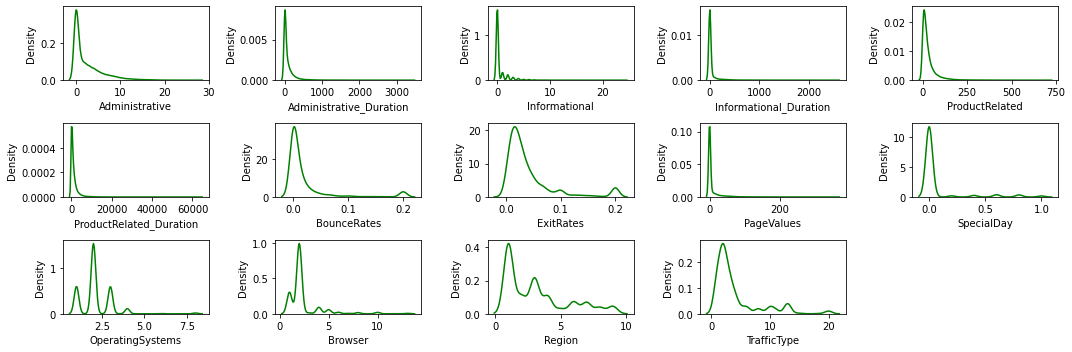

In [ ]:
plt.figure(figsize=(15, 5))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(x=df[nums[i]], color='green')
    plt.xlabel(nums[i])
    plt.tight_layout()

First we select the columns with contain outliers, than we BOXCOX method to remove outliers from that columns and replace that value to that columns too. Create a for loop to make this process easy.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Administrative process is completed


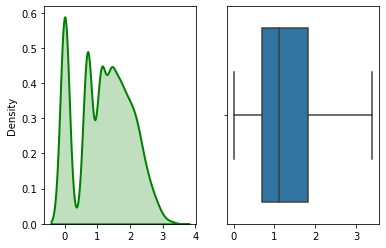

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Administrative_Duration process is completed


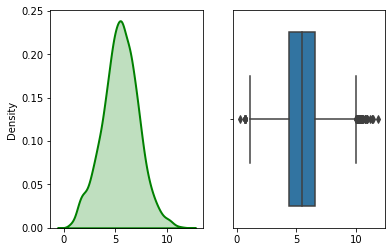

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Informational process is completed


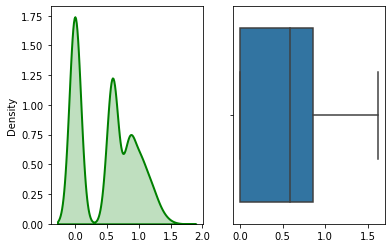

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Informational_Duration process is completed


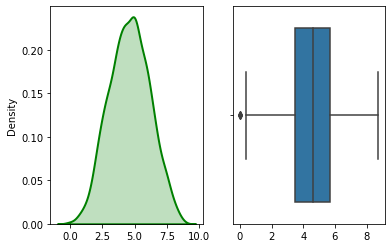

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ProductRelated process is completed


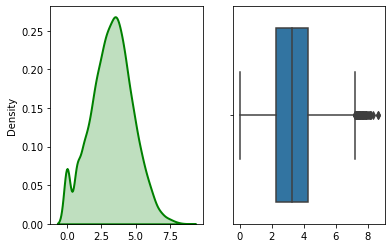

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ProductRelated_Duration process is completed


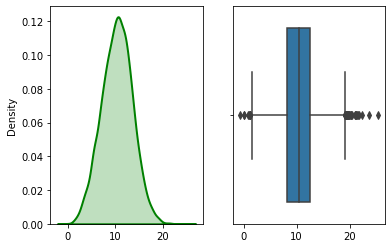

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


BounceRates process is completed


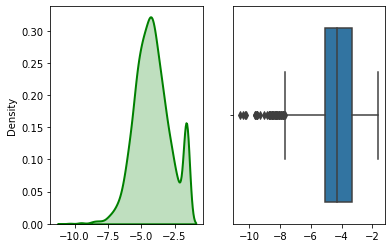

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


PageValues process is completed


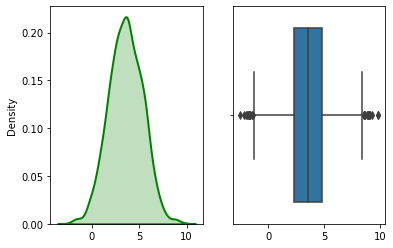

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


SpecialDay process is completed


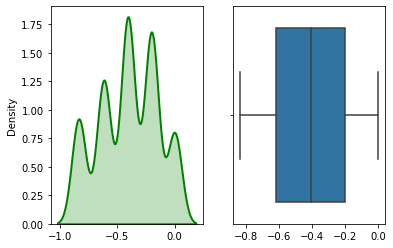

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


TrafficType process is completed


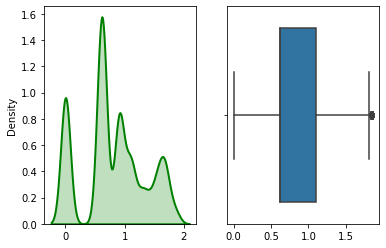

In [ ]:
from scipy import stats

# transform training data & save lambda value
df_list = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 
           'ProductRelated_Duration', 'BounceRates', 'PageValues', 'SpecialDay', 'TrafficType']
for col in df_list:
    if df[col].dtypes == 'int64' or df[col].dtypes == 'float64':
        posdata = df[col][df[col] > 0]
        col_data, fitted_lambda = stats.boxcox(posdata)
        
  
        # creating axes to draw plots
        fig, ax = plt.subplots(1,2)


        sns.distplot(col_data, hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 2}, 
                     label = "Normal", color ="green", ax = ax[0])
        df.loc[df[col] > 0, col] = col_data
        print('{} process is completed'.format(col))

        plt.subplot(122)
        sns.boxplot(col_data)
        plt.show()

In [ ]:
from scipy import stats

In [ ]:
# handling outlier dengan zscore

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in df_list:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 12205
Jumlah baris setelah memfilter outlier: 10962


## 1D. Feature Transformation

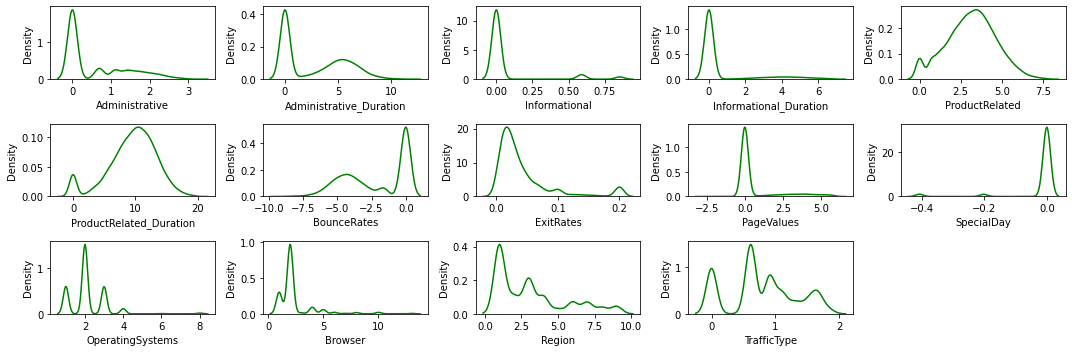

In [ ]:
plt.figure(figsize=(15, 5))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(x=df[nums[i]], color='green')
    plt.xlabel(nums[i])
    plt.tight_layout()

In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,10962.000000,10962.000000,10962.000000,10962.000000,10962.000000,10962.000000,10962.000000,10962.000000,10962.000000,10962.000000,10962.000000,10962.000000,10962.000000,10962.000000
mean,0.596822,2.735919,0.060682,0.639716,3.134861,9.557203,-2.210685,0.042488,0.644961,-0.018492,2.123974,2.356413,3.163109,0.795914
std,0.807682,2.950553,0.197010,1.572415,1.499542,3.822848,2.274509,0.046927,1.478114,0.077331,0.901930,1.696917,2.408405,0.536341
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.662000,-8.816672,0.000000,-2.538145,-0.407035,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2.109223,7.500465,-4.322794,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,0.615207
50%,0.000000,1.728677,0.000000,0.000000,3.188173,9.979754,-1.611313,0.025641,0.000000,0.000000,2.000000,2.000000,3.000000,0.615207
75%,1.109393,5.436045,0.000000,0.000000,4.163634,12.148793,0.000000,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,1.097452
max,3.128280,11.416543,0.852632,6.758655,7.734792,19.838502,0.000000,0.200000,5.909162,0.000000,8.000000,13.000000,9.000000,1.852826


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# exitrates kita re-scale ke [0,1]
df['exitrates_norm'] = MinMaxScaler().fit_transform(df['ExitRates'].values.reshape(len(df), 1))

# kolom lainnya kita standarisasi (karena distribusi datanya sudah mendekati normal)
df['administrative_std'] = StandardScaler().fit_transform(df['Administrative'].values.reshape(len(df), 1))
df['administrativeduration_std'] = StandardScaler().fit_transform(df['Administrative_Duration'].values.reshape(len(df), 1))
df['informational_std'] = StandardScaler().fit_transform(df['Informational'].values.reshape(len(df), 1))
df['informationalduration_std'] = StandardScaler().fit_transform(df['Informational_Duration'].values.reshape(len(df), 1))
df['productrelated_std'] = StandardScaler().fit_transform(df['ProductRelated'].values.reshape(len(df), 1))
df['productrelatedduration_std'] = StandardScaler().fit_transform(df['ProductRelated_Duration'].values.reshape(len(df), 1))
df['bouncerates_std'] = StandardScaler().fit_transform(df['BounceRates'].values.reshape(len(df), 1))
df['pagevalues_std'] = StandardScaler().fit_transform(df['PageValues'].values.reshape(len(df), 1))
df['specialday_std'] = StandardScaler().fit_transform(df['SpecialDay'].values.reshape(len(df), 1))
df['traffictype_std'] = StandardScaler().fit_transform(df['TrafficType'].values.reshape(len(df), 1))


In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,administrative_std,administrativeduration_std,informational_std,informationalduration_std,productrelated_std,productrelatedduration_std,bouncerates_std,pagevalues_std,specialday_std,traffictype_std
count,10962.000000,10962.000000,10962.000000,10962.000000,10962.000000,10962.000000,10962.000000,10962.000000,10962.000000,10962.000000,...,1.096200e+04,1.096200e+04,1.096200e+04,1.096200e+04,1.096200e+04,1.096200e+04,1.096200e+04,1.096200e+04,1.096200e+04,1.096200e+04
mean,0.596822,2.735919,0.060682,0.639716,3.134861,9.557203,-2.210685,0.042488,0.644961,-0.018492,...,-4.670816e-15,9.897412e-16,1.866961e-15,3.209235e-16,-5.461787e-16,-4.672822e-16,9.924778e-15,-4.076277e-15,-9.371282e-15,-2.684710e-16
std,0.807682,2.950553,0.197010,1.572415,1.499542,3.822848,2.274509,0.046927,1.478114,0.077331,...,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.662000,-8.816672,0.000000,-2.538145,-0.407035,...,-7.389663e-01,-9.272987e-01,-3.080304e-01,-4.068554e-01,-2.090641e+00,-2.673313e+00,-2.904490e+00,-2.153591e+00,-5.024648e+00,-1.484040e+00
25%,0.000000,0.000000,0.000000,0.000000,2.109223,7.500465,-4.322794,0.014286,0.000000,0.000000,...,-7.389663e-01,-9.272987e-01,-3.080304e-01,-4.068554e-01,-6.839987e-01,-5.380365e-01,-9.286425e-01,-4.363606e-01,2.391326e-01,-3.369417e-01
50%,0.000000,1.728677,0.000000,0.000000,3.188173,9.979754,-1.611313,0.025641,0.000000,0.000000,...,-7.389663e-01,-3.413896e-01,-3.080304e-01,-4.068554e-01,3.555408e-02,1.105382e-01,2.635291e-01,-4.363606e-01,2.391326e-01,-3.369417e-01
75%,1.109393,5.436045,0.000000,0.000000,4.163634,12.148793,0.000000,0.050000,0.000000,0.000000,...,6.346486e-01,9.151671e-01,-3.080304e-01,-4.068554e-01,6.860894e-01,6.779522e-01,9.719837e-01,-4.363606e-01,2.391326e-01,5.622396e-01
max,3.128280,11.416543,0.852632,6.758655,7.734792,19.838502,0.000000,0.200000,5.909162,0.000000,...,3.134370e+00,2.942167e+00,4.020023e+00,3.891605e+00,3.067697e+00,2.689557e+00,9.719837e-01,3.561594e+00,2.391326e-01,1.970687e+00


In [ ]:
# drop kolom asli yang sudah di transformasi(karena sudah di-encoding)
df= df.drop ( columns=['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','PageValues','SpecialDay','TrafficType','ExitRates'])

In [ ]:
df.describe()

,OperatingSystems,Browser,Region,exitrates_norm,administrative_std,administrativeduration_std,informational_std,informationalduration_std,productrelated_std,productrelatedduration_std,bouncerates_std,pagevalues_std,specialday_std,traffictype_std
count,10962.000000,10962.000000,10962.000000,10962.000000,1.096200e+04,1.096200e+04,1.096200e+04,1.096200e+04,1.096200e+04,1.096200e+04,1.096200e+04,1.096200e+04,1.096200e+04,1.096200e+04
mean,2.123974,2.356413,3.163109,0.212442,-4.670816e-15,9.897412e-16,1.866961e-15,3.209235e-16,-5.461787e-16,-4.672822e-16,9.924778e-15,-4.076277e-15,-9.371282e-15,-2.684710e-16
std,0.901930,1.696917,2.408405,0.234634,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00
min,1.000000,1.000000,1.000000,0.000000,-7.389663e-01,-9.272987e-01,-3.080304e-01,-4.068554e-01,-2.090641e+00,-2.673313e+00,-2.904490e+00,-2.153591e+00,-5.024648e+00,-1.484040e+00
25%,2.000000,2.000000,1.000000,0.071429,-7.389663e-01,-9.272987e-01,-3.080304e-01,-4.068554e-01,-6.839987e-01,-5.380365e-01,-9.286425e-01,-4.363606e-01,2.391326e-01,-3.369417e-01
50%,2.000000,2.000000,3.000000,0.128205,-7.389663e-01,-3.413896e-01,-3.080304e-01,-4.068554e-01,3.555408e-02,1.105382e-01,2.635291e-01,-4.363606e-01,2.391326e-01,-3.369417e-01
75%,3.000000,2.000000,4.000000,0.250000,6.346486e-01,9.151671e-01,-3.080304e-01,-4.068554e-01,6.860894e-01,6.779522e-01,9.719837e-01,-4.363606e-01,2.391326e-01,5.622396e-01
max,8.000000,13.000000,9.000000,1.000000,3.134370e+00,2.942167e+00,4.020023e+00,3.891605e+00,3.067697e+00,2.689557e+00,9.719837e-01,3.561594e+00,2.391326e-01,1.970687e+00


## 1E. Feature Encoding

In [ ]:
cats = ['Month', 'VisitorType', 'Weekend', 'Revenue']

for col in cats:
  print(f'value counts of column {col}')
  print(df[col].value_counts())
  print('---'*10, '\n')

value counts of column Month
May     2793
Nov     2703
Mar     1759
Dec     1564
Oct      506
Sep      412
Jul      408
Aug      405
June     268
Feb      144
Name: Month, dtype: int64
------------------------------ 

value counts of column VisitorType
Returning_Visitor    9337
New_Visitor          1556
Other                  69
Name: VisitorType, dtype: int64
------------------------------ 

value counts of column Weekend
False    8331
True     2631
Name: Weekend, dtype: int64
------------------------------ 

value counts of column Revenue
False    9434
True     1528
Name: Revenue, dtype: int64
------------------------------ 



Strategi encoding
* `Weekend`, `Revenue` \: label encoding
* `VisitorType`, `Month` \: One Hot Encoding 

In [ ]:
df['Revenue'] = df['Revenue'].astype(int)
df['Revenue'].value_counts()

0    9434
1    1528
Name: Revenue, dtype: int64

In [ ]:
df['Weekend'] = df['Weekend'].astype(int)
df['Weekend'].value_counts()

0    8331
1    2631
Name: Weekend, dtype: int64

In [ ]:
# One hot encoder pekerjaan dan sampo
# WARNING: run code ini sekali saja
for cat in ['VisitorType', 'Month']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [ ]:
# drop kolom visitortype dan month yang asli (karena sudah di-encoding)
df = df.drop(columns=['VisitorType','Month'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10962 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OperatingSystems               10962 non-null  int64  
 1   Browser                        10962 non-null  int64  
 2   Region                         10962 non-null  int64  
 3   Weekend                        10962 non-null  int64  
 4   Revenue                        10962 non-null  int64  
 5   exitrates_norm                 10962 non-null  float64
 6   administrative_std             10962 non-null  float64
 7   administrativeduration_std     10962 non-null  float64
 8   informational_std              10962 non-null  float64
 9   informationalduration_std      10962 non-null  float64
 10  productrelated_std             10962 non-null  float64
 11  productrelatedduration_std     10962 non-null  float64
 12  bouncerates_std                10962 non-null 

## 1F. Handle class imbalance

In [ ]:
# pembuatan binary label target yang imbalance (sebagai contoh)
df['revenue_class'] = df['Revenue'] > 0.8
df['revenue_class'].value_counts()

False    9434
True     1528
Name: revenue_class, dtype: int64

In [ ]:
# pemisahan features vs target
X = df[[col for col in df.columns if (str(df[col].dtype) != 'object') and col not in ['Revenue', 'revenue_class']]]
y = df['revenue_class'].values
print(X.shape)
print(y.shape)

(10962, 28)
(10962,)


In [ ]:
from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler(0.5).fit_resample(X, y)
X_over, y_over = over_sampling.RandomOverSampler(0.5).fit_resample(X, y)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.5).fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [ ]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
False    9434
True     1528
dtype: int64


OVERSAMPLING
False    9434
True     4717
dtype: int64


SMOTE
False    9434
True     4717
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10962 entries, 0 to 12329
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OperatingSystems               10962 non-null  int64  
 1   Browser                        10962 non-null  int64  
 2   Region                         10962 non-null  int64  
 3   Weekend                        10962 non-null  int64  
 4   Revenue                        10962 non-null  int64  
 5   exitrates_norm                 10962 non-null  float64
 6   administrative_std             10962 non-null  float64
 7   administrativeduration_std     10962 non-null  float64
 8   informational_std              10962 non-null  float64
 9   informationalduration_std      10962 non-null  float64
 10  productrelated_std             10962 non-null  float64
 11  productrelatedduration_std     10962 non-null  float64
 12  bouncerates_std                10962 non-null 

## 2A. Feature selection

In [ ]:
df3 = df.drop(columns=['productrelatedduration_std', 'bouncerates_std'])

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10962 entries, 0 to 12329
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OperatingSystems               10962 non-null  int64  
 1   Browser                        10962 non-null  int64  
 2   Region                         10962 non-null  int64  
 3   Weekend                        10962 non-null  int64  
 4   Revenue                        10962 non-null  int64  
 5   exitrates_norm                 10962 non-null  float64
 6   administrative_std             10962 non-null  float64
 7   administrativeduration_std     10962 non-null  float64
 8   informational_std              10962 non-null  float64
 9   informationalduration_std      10962 non-null  float64
 10  productrelated_std             10962 non-null  float64
 11  pagevalues_std                 10962 non-null  float64
 12  specialday_std                 10962 non-null 

- Feature yang kurang relevan = OperatingSystem, Browser,Region,TrafficType, dan Weekend (karena r < 0.05)
- Feature redundan = ProductRelated_Duration/ProductRelated, BounceRates/ExitRates (karena r>0.7)
- Feature penyebab multicolinarity = Region, Month, VisitorType_Other

## 2B. Feature Extraction

In [ ]:
df.loc[(df.Month == "Jan") | (df.Month == "Feb") | (df.Month == "Mar"), "Kuartil"] = 1
df.loc[(df.Month == "Apr") | (df.Month == "May") | (df.Month == "June"), "Kuartil"] = 2
df.loc[(df.Month == "Jul") | (df.Month == "Aug") | (df.Month == "sep"), "Kuartil"] = 3
df.loc[(df.Month == "Oct") | (df.Month == "Nov") | (df.Month == "Dec"), "Kuartil"] = 4

In [ ]:
Dalam dunia industri dan bisnis kategori kuartil digunakan untuk membuat laporan keuangan dengan membagi hasi total revenue per kuartil

## 2C. Tambahan feature diluar dataset

- gender
- usia
- pekerjaan
- pendidikan terakhir
- harga
- jumlah diskon/promo
- metode pembayaran
- Biaya kirim

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10962 entries, 0 to 12329
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OperatingSystems               10962 non-null  int64  
 1   Browser                        10962 non-null  int64  
 2   Region                         10962 non-null  int64  
 3   Weekend                        10962 non-null  int64  
 4   Revenue                        10962 non-null  int64  
 5   exitrates_norm                 10962 non-null  float64
 6   administrative_std             10962 non-null  float64
 7   administrativeduration_std     10962 non-null  float64
 8   informational_std              10962 non-null  float64
 9   informationalduration_std      10962 non-null  float64
 10  productrelated_std             10962 non-null  float64
 11  productrelatedduration_std     10962 non-null  float64
 12  bouncerates_std                10962 non-null 